# ST816 Project 1

### 1. Simulating observations from Student's $t$-distribution

Let $X$ be a random variable with Student's $t$-distribution and parameter $\nu \in(0, \infty)$. The density function of Student's $t$-distribution with parameter $\nu \in(0, \infty)$ is given by:
    $$\begin{equation*}
        f(x)=\frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\sqrt{\nu \pi} \Gamma\left(\frac{\nu}{2}\right)}\left(1+\frac{x^2}{\nu}\right)^{-(\nu+1) / 2}
    \end{equation*}$$
    for $x\in \mathbb{R} $, where $\Gamma$ is the gamma function.

#### (a)

#### (b)

#### (c)

### 2. Density estimation

In [ ]:
# Load dataset 
data(faithful)

In [5]:
head(faithful)

,eruptions,waiting
,<dbl>,<dbl>
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85
6,2.883,55


#### (a)

pdf 
  5

pdf 
  2

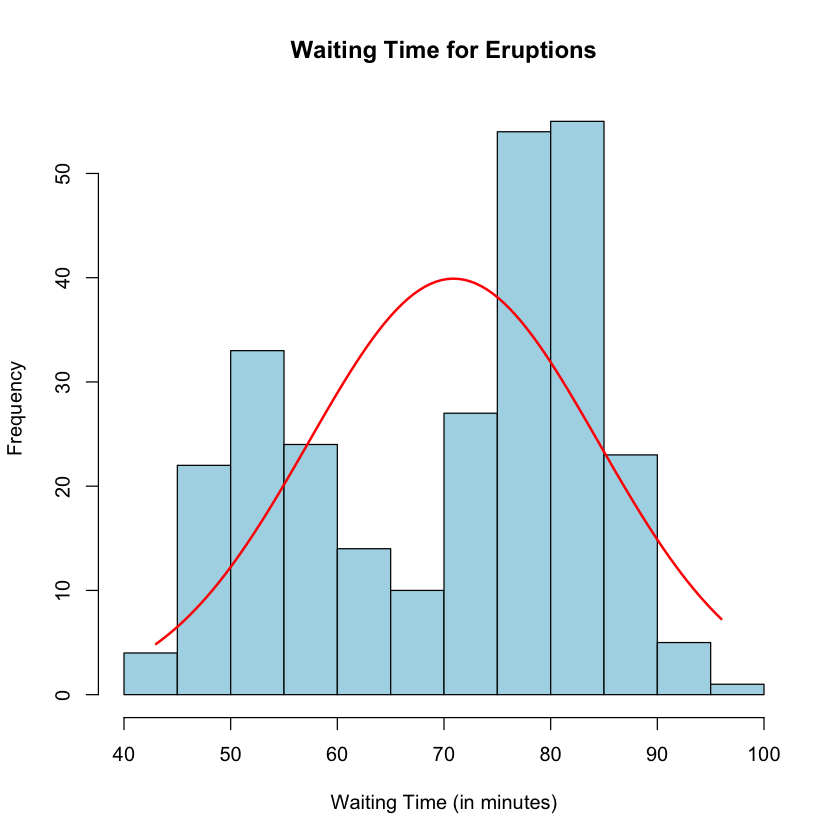

In [ ]:
# Create a histogram of the waiting variable
hist(faithful$waiting,
     main = "Waiting Time for Eruptions",
     xlab = "Waiting Time (in minutes)",
     ylab = "Frequency",
     col = "lightblue",
     border = "black")
# Add a normal curve to the histogram
x <- seq(min(faithful$waiting), max(faithful$waiting), length=100)
y <- dnorm(x, mean=mean(faithful$waiting), sd=sd(faithful$waiting))
lines(x, y * diff(hist(faithful$waiting, plot=FALSE)$breaks)[1] * length(faithful$waiting), col="red", lwd=2)

# Save plot
dev.copy(pdf, file="images/faithful_histogram.pdf")
dev.off()

From the plot one can see two distinct peaks, i.e., `waiting` is bimodial. This bomodality suggests the Old Faithful Geyser has two typical patterns of eruption intervals. The two peaks are also not symmetrical - the peak at around ~80-85 minutes have a higher frequency compared to the peak around ~50-55 minutes.

#### (b)

the oversmoothed bandwith $\hat{h}_{OS}$ is given by:
$\begin{equation}
    \hat{h}_{OS} = 3 \left(\frac{\hat{\sigma}^5}{35n}\right)^{1/5}
\end{equation}$
where $\hat{\sigma}$ is the sample standard deviation and $n$ is the number of observations.

In [2]:
# Use the standard normal kernel to estimate the density of the waiting variable
waiting <- faithful$waiting
n <- length(waiting)
sigma <- sd(waiting)
h_OS <- 3 * ((sigma^5) / (35 * n))^(1/5)
cat("Oversmoothed bandwidth (h_OS):", h_OS, "\n")

Oversmoothed bandwidth (h_OS): 6.527881 


In [11]:
print(length(waiting))
print(sd(waiting))

[1] 272
[1] 13.59497


pdf 
  3

pdf 
  2

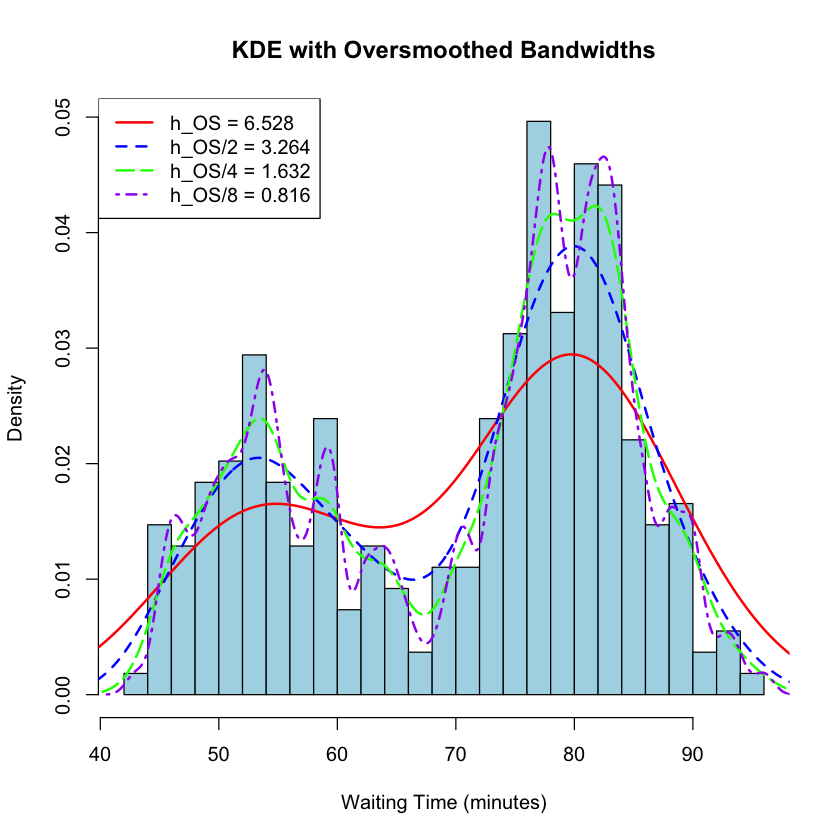

In [ ]:
# Plot histogram
hist(waiting, prob = TRUE, breaks = 20, col = "lightblue",
     main = "KDE with Oversmoothed Bandwidths",
     xlab = "Waiting Time (minutes)")

lines(density(waiting, bw=h_OS), col="red", lwd=2, lty=1)          # h_OS
lines(density(waiting, bw=h_OS/2), col="blue", lwd=2, lty=2)       # h_OS/2
lines(density(waiting, bw=h_OS/4), col="green", lwd=2, lty=5)      # h_OS/4
lines(density(waiting, bw=h_OS/8), col="purple", lwd=2, lty=4)     # h_OS/8

legend("topleft", 
       legend = c(paste0("h_OS = ", round(h_OS, 3)),
                 paste0("h_OS/2 = ", round(h_OS/2, 3)),
                 paste0("h_OS/4 = ", round(h_OS/4, 3)),
                 paste0("h_OS/8 = ", round(h_OS/8, 3))),
       col=c("red", "blue", "green", "purple"), lwd=2,
       lty=c(1, 2, 5, 4))
       
# Save plot
dev.copy(pdf, file="images/bandwith_histogram.pdf")
dev.off()

$\hat{h}_{OS}$: the broad bimodial structure is visible.

$\hat{h}_{OS}/2$: two clear peaks.

$\hat{h}_{OS}/4$: small bumps, though reasonable.

$\hat{h}_{OS}/8$: spurious peaks and overfits noise. 


#### (c)

Normal scale bandwith selector assumes the underlying distribution is normally distributed and calculates the bandwith:
$
\begin{equation}
    h=1.06 \cdot \hat{\sigma} \cdot n^{-1/5}
\end{equation}
$
where $\hat{\sigma}$ is the sample standard deviation and $n$ is the number of observations.

This selector is not ideal since `waiting` is bimodial and the normal scale bandwith selector assumes normality and thus, `waiting` violates this. Additionally, there would be risks for oversmoothing due to the bimodality, blurring the true peaks. One could forcibly apply the selector, but it would underfit the data and smooth out bimodality, so no, it does not make sense to use the normal scale scale bandwith for the `waiting` variable.

#### (d)

In [12]:
# Normal scale
s <- sd(waiting)
IQR <- IQR(waiting)
h_NS <- (8 * sqrt(pi) * (1/(2*sqrt(pi))) / (3 * 1^4 * n))^(1/5) * min(s, IQR/1.34)
h_NS

[1] 4.693019

In [ ]:
# Pseudo-Likelihood
h_PL <- bw.SJ(waiting, method="ste")
h_PL 

[1] 2.504371

In [18]:
# Least squares cross-validation
h_LSCV <- bw.ucv(waiting)
h_LSCV

[1] 2.658185

In [19]:
# Biased cross-validation
h_BCV <- bw.bcv(waiting)
h_BCV

[1] 2.597559

In [17]:
# Sheather-Jones
h_SJ <- bw.SJ(waiting)
h_SJ

[1] 2.504371

pdf 
  3

pdf 
  2

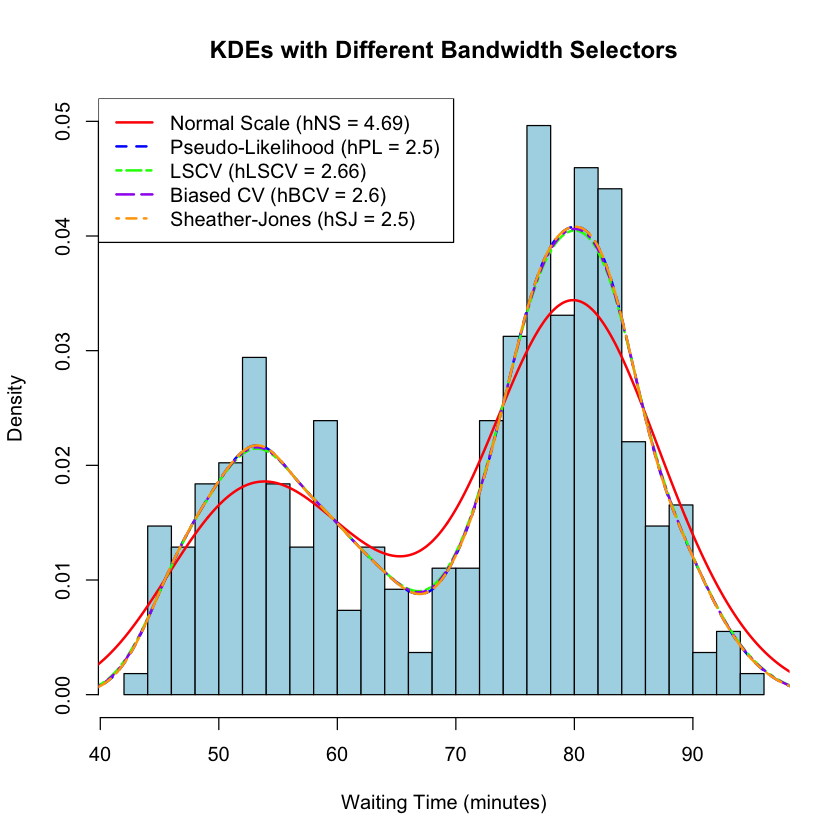

In [24]:
# Histogram 
hist(waiting, prob=TRUE, breaks=20, col="lightblue",
     main = "KDEs with Different Bandwidth Selectors",
     xlab = "Waiting Time (minutes)", ylim = c(0, 0.05))

# Add KDEs
lines(density(waiting, bw=h_NS),  col="red",   lwd=2, lty=1) 
lines(density(waiting, bw=h_PL),  col="blue",  lwd=2, lty=2)  
lines(density(waiting, bw=h_LSCV), col="green", lwd=2, lty=6)  
lines(density(waiting, bw=h_BCV), col="purple",lwd=2, lty=4) 
lines(density(waiting, bw=h_SJ),  col="orange",lwd=2, lty=5)

# Legend
legend("topleft",
       legend = c(
         paste0("Normal Scale (hNS = ", round(h_NS, 2), ")"),
         paste0("Pseudo-Likelihood (hPL = ", round(h_PL, 2), ")"),
         paste0("LSCV (hLSCV = ", round(h_LSCV, 2), ")"),
         paste0("Biased CV (hBCV = ", round(h_BCV, 2), ")"),
         paste0("Sheather-Jones (hSJ = ", round(h_SJ, 2), ")")),
       col=c("red", "blue", "green", "purple", "orange"),
       lwd=2, lty=c(1, 2, 6, 5, 4))

dev.copy(pdf, file="images/selectors_bandwith.pdf")
dev.off()

#### (e)

Sheather-Jones kernel is optimised for the standard normal kernel. One has to convert equivalent bandwidths for other kernels by using the canonical bandwidth scaling factor on kernel efficiency:
$
\begin{equation}
    h_{\operatorname{new}}=h_{SJ}
\end{equation}
$

The Asymptotic Mean Integrated Squared Error (AMISE) for a kernel $K$ is given by:
$
\begin{equation}
    h_{\operatorname{AMISE}}=\left(\frac{R(K)}{n \mu_2 (K)^2R(f'')}   \right)^{1/5}
\end{equation}
$
Where $R(K)$ is the roughness of the kernel, $\mu_2 K$ is the variance of the kernel, and $R(f'')$ is the roughness of the second derivative of the true density $f$. 

To compare bandwidths across kernels, one has to eliminate the second derivative of the true density since it is unknown but constant for a given dataset. This can be done by taking the ratio between two kernels $K_1$ and $K_2$:
$
\begin{equation}
    \frac{h_1}{h_2} = \left(\frac{R(K_1)\mu_2 (K_2)^2}{R(K_2)\mu_2 (K_1)^2} \right)^{1/5}
\end{equation}
$
which results in the scaling factor needed to convert $h_{SJ}$ to another kernel. 

For the standard normal kernel $R(K_1)=\frac{1}{2\sqrt{\pi}'}$ and $\mu_2 (K_1)=1$

In [27]:
h_SJ <- 2.50
kernels <- c("gaussian", "epanechnikov", "rectangular", "triangular", "biweight")
scaling <- c(1, 0.776, 0.768, 0.727, 0.685) # scaling factors
h_transformed <- h_SJ * scaling

pdf 
  3

pdf 
  2

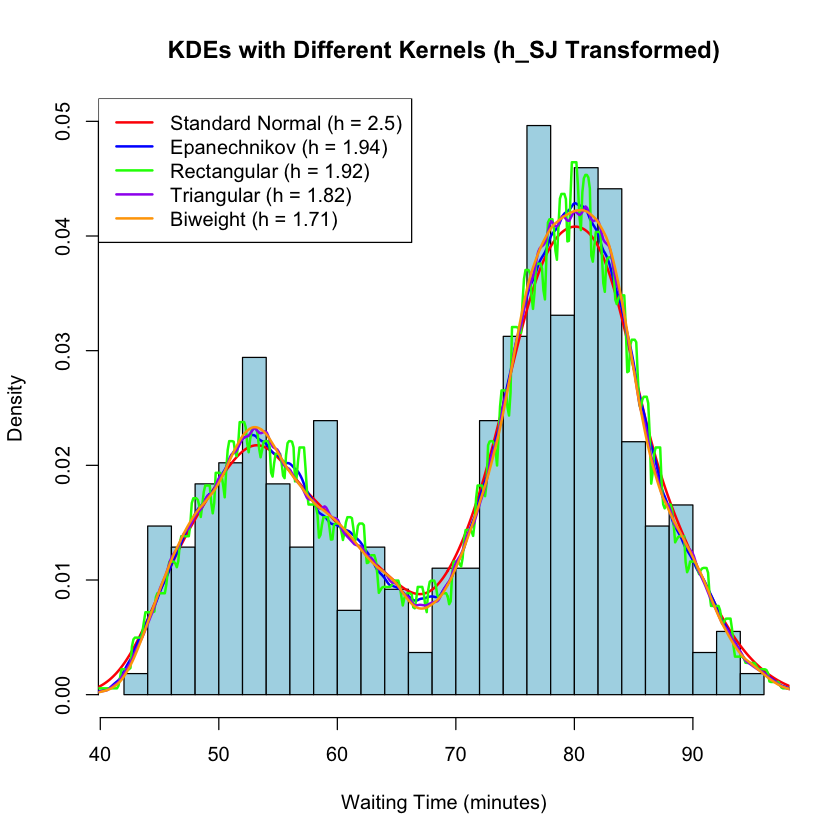

In [31]:
# Plot histogram
hist(waiting, prob=TRUE, breaks=20, col="lightblue",
     main = "KDEs with Different Kernels (h_SJ Transformed)",
     xlab = "Waiting Time (minutes)", ylim=c(0, 0.05))

# Add KDEs
lines(density(waiting, kernel="gaussian", bw=h_SJ), col="red", lwd=2)  
lines(density(waiting, kernel="epanechnikov", bw=h_transformed[2]), col="blue", lwd=2)
lines(density(waiting, kernel="rectangular", bw=h_transformed[3]), col="green", lwd=2) 
lines(density(waiting, kernel="triangular", bw=h_transformed[4]), col="purple", lwd=2)  
lines(density(waiting, kernel="biweight", bw=h_transformed[5]), col="orange", lwd=2)

# Legend
legend("topleft",
       legend=c(paste0("Standard Normal (h = ", h_SJ, ")"),
                paste0("Epanechnikov (h = ", round(h_transformed[2], 2), ")"),
                paste0("Rectangular (h = ", round(h_transformed[3], 2), ")"),
                paste0("Triangular (h = ", round(h_transformed[4], 2), ")"),
                paste0("Biweight (h = ", round(h_transformed[5], 2), ")")),
       col=c("red", "blue", "green", "purple", "orange"), lwd = 2)
       
dev.copy(pdf, file="images/kernel_bandwith.pdf")
dev.off()